# Problem

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Our benchmark has the following properties:

 - Single-image, multi-class classification problem
 - More than 40 classes
 - More than 50,000 images in total

### Setup library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

### Setup Data , Feature and Labels

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

### Retrieving the images and their labels 

In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#### Converting lists into numpy arrays

In [4]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


### Splitting training and testing dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Length of train_features is: {X_train.shape}")
print(f"Length of train_labels is: {y_train.shape}")
print(f"Length of test_features is: {X_test.shape}")
print(f"Length of test_labels is: {y_test.shape}")

Length of train_features is: (31367, 30, 30, 3)
Length of train_labels is: (31367,)
Length of test_features is: (7842, 30, 30, 3)
Length of test_labels is: (7842,)


### Converting the labels into one hot encoding

In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## CNN model

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

### Compilation of the model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 93s 94ms/step - loss: 1.7782 - accuracy: 0.5665 - val_loss: 0.2768 - val_accuracy: 0.9226
Epoch 2/15
981/981 [==============================] - 96s 98ms/step - loss: 0.4411 - accuracy: 0.8767 - val_loss: 0.1310 - val_accuracy: 0.9665
Epoch 3/15
981/981 [==============================] - 97s 99ms/step - loss: 0.3086 - accuracy: 0.9141 - val_loss: 0.0856 - val_accuracy: 0.9778
Epoch 4/15
981/981 [==============================] - 86s 88ms/step - loss: 0.2605 - accuracy: 0.9297 - val_loss: 0.0667 - val_accuracy: 0.9815
Epoch 5/15
981/981 [==============================] - 91s 93ms/step - loss: 0.2294 - accuracy: 0.9393 - val_loss: 0.0594 - val_accuracy: 0.9834
Epoch 6/15
981/981 [==============================] - 94s 96ms/step - loss: 0.2275 - accuracy: 0.9412 - val_loss: 0.0671 - val_accuracy: 0.9815
Epoch 7/15
981/981 [==============================] - 96s 98ms/step - loss: 0.2267 - accuracy: 0.9442 - val_loss: 0.0607 - val_accuracy:

## Save Model

In [9]:
model.save("model.h5")

## plotting graphs for accuracy 

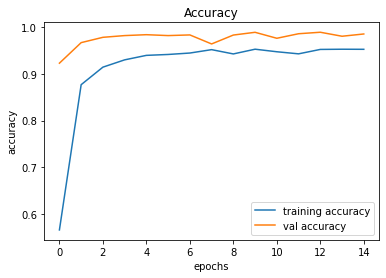

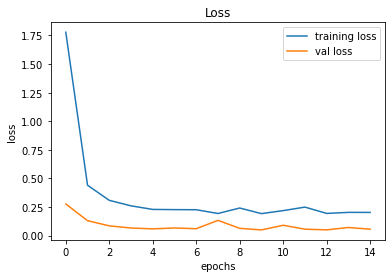

In [10]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testing accuracy on test dataset

In [11]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.9554235946159937


In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0